# Dimensionality Reduction: Principle Component Analysis (PCA)

Rafiq Islam  
2024-09-24

## Introduction

Principal Component Analysis (PCA) is a powerful technique used in
machine learning and statistics for **unsupervised dimensionality
reduction**. It transforms high-dimensional data into a
lower-dimensional form while preserving the most important features or
“components” of the data. This is particularly useful when dealing with
large datasets that are difficult to visualize or computationally
expensive to process.<br> <br> For example, if we have a dataset that
contains a lot of images of 20x20 pixels and we convert the images to
one dimensional vectors then there are total 400 features which makes
the analysis harder. PCA finds a low (best $d$) dimensional subspace
approximation that minimizes the least square error

------------------------------------------------------------------------

## What is Principal Component Analysis (PCA)?

Let’s start from the beginning. If we have a set of orthogonal basis
vectors say $\mathbf{u}=(u_1,u_2,\dots, u_p)$ then
$u_i^Tu_j=\delta_{ij}$ for $1\le i,j \le m$. For example, consider
$u_1=\begin{bmatrix}1\\ 0\end{bmatrix}$ and
$u_2=\begin{bmatrix}0\\1\end{bmatrix}$

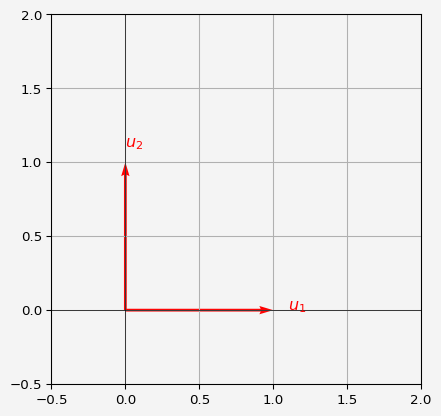

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_xlim(-0.5,2)
ax.set_ylim(-0.5,2)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.quiver(0,0,1,0, color='red', scale=1, scale_units='xy', angles='xy')
ax.quiver(0,0,0,1, color='red', scale=1, scale_units='xy', angles='xy')
ax.text(1.1,0, '$u_1$', color='red', fontsize=12)
ax.text(0,1.1, '$u_2$', color='red', fontsize=12)
ax.set_aspect('equal')
plt.grid(True)
plt.gca().set_facecolor('#f4f4f4') 
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

Now suppose we have a data set $X$ with columns are features and $k$th
observation $x^{(k)}=(x_1^{(k)},x_2^{(k)},\dots,x_p^{(k)})^T$. Now let
$\mu=\bar{x}= \frac{1}{n}\sum_{k=1}^{n}x^k$, that is for

Now with the orthogonal vectors, we can write
$$ x^k-\mu = \sum_{i=1}^{p}\left[(x^k-\mu)\cdot u_i\right]u_i = \sum_{i=1}^{p} a_i^k u_i$$

In PCA, we aim to find $(u_1,u_2,\dots, u_d)$ that minimizes the
reconstruction error, defined as the squared distance between each data
point $x^k$ and its projection onto the subspace spanned by the top $d$
principle components:
$$\mathbf{E}(u_1,u_2,\dots, u_d)=\sum_{k=1}^{n}\left\|x^k -\left(\mu+\sum_{i=1}^{d} a_i^k u_i\right)\right\|^2$$

Here $\sum_{i=1}^{d} a_i^ku_i$ is the projection of $x^k$ onto the
subspace spanned by the top $d$ dimensional components. The term inside
the norm, $x^k -\left(\mu+\sum_{i=1}^{d} a_i^k u_i\right)$, represents
the residual error after projecting $x^k$ onto this subspace. The goal
is to minimize this error.

The residual variance corresponds to the directions (or principal
components) **not** captured by the top $d$ principal components.
Specifically, these are the components corresponding to
$u_{d+1}, \dots, u_p$, where $p$ is the total number of features (or
components).

Now, the norm inside the error function can be decomposed as follows:

$$
x^k - \left( \bar{x} + \sum_{i=1}^{d} a_i^k u_i \right) = \left( x^k - \bar{x} \right) - \sum_{i=1}^{d} a_i^k u_i
$$

We define $z^k = x^k - \bar{x}$, so the error becomes:

$$
E(u_1, \dots, u_d) = \sum_{k=1}^{n} \left\| z^k - \sum_{i=1}^{d} a_i^k u_i \right\|^2
$$

The key idea here is that $z^k$ is a vector in the original
$p$-dimensional space, and we are approximating it by projecting it onto
the top $d$-dimensional subspace spanned by $u_1, \dots, u_d$.

Since $u_1, \dots, u_p$ form an orthogonal basis, $z^k$ can be
completely expressed in terms of all the basis vectors
$u_1, \dots, u_p$. In particular:

$$
z^k = \sum_{i=1}^{p} a_i^k u_i
$$

where $a_i^k = z^k \cdot u_i$ are the projections of $z^k$ onto each
basis vector $u_i$. Therefore, the reconstruction error
$E(u_1, \dots, u_d)$ is the squared norm of the residual part of $z^k$
that is **not captured** by the top $d$ principal components:

$$
E(u_1, \dots, u_d) = \sum_{k=1}^{n} \sum_{i=d+1}^{M} (a_i^k)^2
$$

This means that the error comes from the projection of $z^k$ onto the
remaining $p-d$ principal components, i.e., $u_{d+1}, \dots, u_p$. Thus,

We start with the dot product $z^k \cdot u_i$, which is just a scalar:

$$
z^k \cdot u_i = (z^k)^T u_i
$$

This is simply the sum of the element-wise products of $z^k$ and $u_i$:

Notice that we can rewrite the product $z_j^k z_l^k$ as an **outer
product** of the vector $z^k$ with itself:

$$
z^k z^{kT}
$$

The outer product $z^k z^{kT}$ is a matrix, specifically an $p \times p$
matrix. Each element of this matrix at position $(j, l)$ is
$z_j^k z_l^k$, exactly what we have in the double sum.

So, instead of writing out all the sums explicitly, we can represent the
whole thing as a matrix:

$$
(z^k \cdot u_i)^2 = u_i^T (z^k z^{kT}) u_i
$$

This is called a **quadratic form**. So,

where,

-   $\Sigma = \sum_{k=1}^{n}(x^k-\mu)(x^k-\mu)^T=X^TX$  
-   $X=(x^1-\mu, x^2-\mu,\dots,x^p-\mu)^T$

So now we have $$E(\mathbf{u})=\sum_{i=d+1}^{p} u_i^T\Sigma u_i $$

and $E(\mathbf{u})$ is minimized when $u_i$’s are the eigenvectors of
$\Sigma$. Then

$$E(\mathbf{u})=\sum_{i=d+1}^{p} u_i^T\lambda_i u_i =\sum_{i=d+1}^{p} \lambda_i $$

and we get our desired $u_{d+1},\dots, u_{p}$ components that minimizes
the projection error. So if we take the first $d$ of these correspond to
the $d$-largest eigenvalues we get the principle components.

**Long story short**

-   We have $n$ data points with $p$ column vectors
    $x^1,x^2,\dots,x^p$  
-   We compute the mean $\mu= \frac{1}{n}\sum_{k=1}^{n}x^k$  
-   Then we compute the matrix $X=(x^1-\mu, x^2-\mu,\dots,x^p-\mu)^T$  
-   Next, compute the eigenvalues of
    $\Sigma = \sum_{k=1}^{n}(x^k-\mu)(x^k-\mu)^T=X^TX$ and short them in
    decreasing order  
-   Choose $d$, the number of principle components
-   Then we get the principle components
    $P=[v_1,v_2,\dots, v_d]_{p\times d}$  
-   To project any column vector $z$, we compute
    $projection(z)=P^T(z-\mu)$

------------------------------------------------------------------------

## Benefits of PCA

-   **Dimensionality Reduction**: PCA can reduce the number of
    variables, which speeds up algorithms and makes models more
    interpretable.
-   **Visualization**: PCA is often used to project high-dimensional
    data into 2D or 3D for visualization.
-   **Noise Reduction**: By focusing on the principal components, PCA
    can eliminate irrelevant noise in the data.
-   **Avoid Multicollinearity**: PCA removes multicollinearity by
    creating uncorrelated principal components.

------------------------------------------------------------------------

## Limitations of PCA

-   **Linear Assumption**: PCA assumes linear relationships between
    features. Non-linear patterns in data are not captured well by PCA.
-   **Interpretability**: While PCA can simplify data, the new
    components may not be easily interpretable.
-   **Loss of Information**: Reducing dimensions might result in the
    loss of some information or variance, depending on how many
    components are retained.

------------------------------------------------------------------------

## PCA in Python: Implementation and Visualization

Now that we understand the theory behind PCA, let’s implement it in
Python using the `sklearn` library and visualize the results.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

For this example, we will use the famous Iris dataset, which contains 4
features (sepal length, sepal width, petal length, and petal width) of 3
species of iris flowers.

In [3]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

We will reduce the data from 4 dimensions to 2 for visualization.

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

Explained Variance Ratio: [0.72962445 0.22850762]

The explained variance ratio shows how much variance each principal
component captures. In many cases, the first two components capture most
of the variance.

Let’s plot the Iris dataset using the first two principal components.

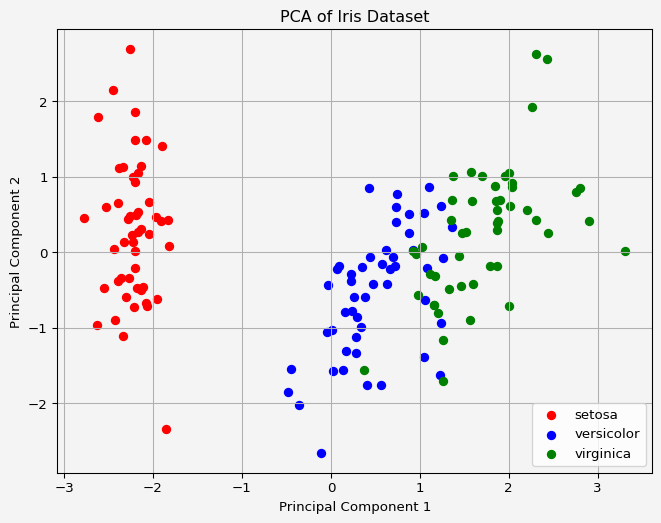

In [5]:
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green']
for i, color in enumerate(colors):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=iris.target_names[i], color=color)

plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.savefig('pca.png')
plt.gca().set_facecolor('#f4f4f4') 
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

The plot shows the data projected onto the first two principal
components. We can observe how the three species cluster in the reduced
2D space. This visualization helps us see the separability of the
classes using only two dimensions, instead of four.

------------------------------------------------------------------------

### **References**

1.  **Jolliffe, I. T.** (2002). *Principal Component Analysis*. Springer
    Series in Statistics.
    -   The seminal book on PCA, providing an in-depth theoretical
        background.
2.  **Shlens, J.** (2014). A tutorial on principal component analysis.
    *arXiv preprint arXiv:1404.1100*.
    -   An excellent tutorial that breaks down PCA concepts with clear
        mathematical derivations.
3.  **Bishop, C. M.** (2006). *Pattern Recognition and Machine
    Learning*. Springer.
    -   This book offers a comprehensive guide to PCA and other machine
        learning techniques.
4.  **Hastie, T., Tibshirani, R., & Friedman, J.** (2009). *The Elements
    of Statistical Learning*. Springer.
    -   Covers PCA as well as a variety of other machine learning and
        statistical techniques.
5.  **Géron, A.** (2019). *Hands-On Machine Learning with Scikit-Learn,
    Keras, and TensorFlow*. O’Reilly Media.
    -   A practical guide with hands-on code examples, including PCA
        implementation in Python.

------------------------------------------------------------------------

**Share on**

<a href="https://www.facebook.com/sharer.php?u=https://mrislambd.github.io/dsandml/posts/pca/" target="_blank" style="color:#1877F2; text-decoration: none;">

</a>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https://mrislambd.github.io/dsandml/posts/pca/" target="_blank" style="color:#0077B5; text-decoration: none;">

</a>

<a href="https://www.twitter.com/intent/tweet?url=https://mrislambd.github.io/dsandml/posts/pca/" target="_blank" style="color:#1DA1F2; text-decoration: none;">

</a>

**You may also like**